In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the data
retail_data_train=pd.read_excel("train.xlsx")
print("done")

done


In [3]:
# Lets see the shape of the data
retail_data_train.shape

(379336, 8)

In [4]:
retail_data_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom


In [5]:
# lets check the sData types of the features
retail_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379336 entries, 0 to 379335
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379336 non-null  object        
 1   StockCode    379336 non-null  object        
 2   Description  378373 non-null  object        
 3   Quantity     379336 non-null  int64         
 4   InvoiceDate  379336 non-null  datetime64[ns]
 5   UnitPrice    379336 non-null  float64       
 6   CustomerID   285076 non-null  float64       
 7   Country      379336 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.2+ MB


In [6]:
# lets check the missing values of the features
round((retail_data_train.isnull().sum()/retail_data_train.shape[0])*100,2).sort_values(ascending=False)

CustomerID     24.85
Description     0.25
InvoiceNo       0.00
StockCode       0.00
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
Country         0.00
dtype: float64

In [7]:
retail_data_train.dropna(axis=0,inplace=True)

In [8]:
# lets check the missing values of the features
round((retail_data_train.isnull().sum()/retail_data_train.shape[0])*100,2).sort_values(ascending=False)

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [9]:
retail_data_train.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,285076.000000,285076,285076.000000,285076.000000
mean,12.028785,2011-07-10 11:54:57.745653760,3.516181,15288.302463
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 14:02:00,1.250000,13958.750000
50%,5.000000,2011-07-29 15:12:00,1.950000,15152.000000
75%,12.000000,2011-10-20 12:24:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,295.736952,NaN,80.314841,1712.323663


In [10]:
retail_data_train['Country'].unique()

array(['United Kingdom', 'Channel Islands', 'Poland', 'France', 'Belgium',
       'EIRE', 'Norway', 'Portugal', 'Netherlands', 'Israel',
       'Switzerland', 'Germany', 'Italy', 'USA', 'Australia', 'Sweden',
       'Czech Republic', 'Spain', 'Cyprus', 'Singapore', 'Japan',
       'Canada', 'European Community', 'United Arab Emirates', 'Denmark',
       'Austria', 'Finland', 'Malta', 'Lithuania', 'Bahrain', 'Iceland',
       'Unspecified', 'Brazil', 'Lebanon', 'Greece', 'RSA',
       'Saudi Arabia'], dtype=object)

## ----------Cohort Analysis-------

##### We will find when the customer was aquired and how long, since then, the perticular customer has been makning purchases

In [11]:
# We will convert the Date time values into only date and will set 1 as default day for every invoice for that month.

def get_date(x):
    #getting the date part and setting 1 as default date
    return dt.datetime(x.year,x.month,1)
    

In [12]:
retail_data_train['invoiceDate_dt']=retail_data_train['InvoiceDate'].apply(get_date)

In [13]:
retail_data_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoiceDate_dt
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06-01
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2011-05-01
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2011-01-01
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12-01
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-05-01


### We will now get the date/month when the perticular customer was first acquired.


In [14]:
retail_data_train['Cust_aquire_mnth']=retail_data_train.groupby('CustomerID')['invoiceDate_dt'].transform('min')

In [15]:
retail_data_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoiceDate_dt,Cust_aquire_mnth
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06-01,2011-02-01
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2011-05-01,2010-12-01
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2011-01-01,2010-12-01
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12-01,2010-12-01
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-05-01,2011-02-01


In [16]:
# We will get the months and years for invoice date and cust acquired date
def get_yr_mnt(df,col_name):
    month=df[col_name].dt.month
    year=df[col_name].dt.year
    return month,year

In [17]:
inv_month,inv_year=get_yr_mnt(retail_data_train,'invoiceDate_dt')
cust_month,cust_year=get_yr_mnt(retail_data_train,'Cust_aquire_mnth')

In [18]:
# Now we will see for how long that customer is active
retail_data_train['active_months']=(inv_month-cust_month)+12*(inv_year-cust_year)

In [19]:
retail_data_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoiceDate_dt,Cust_aquire_mnth,active_months
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06-01,2011-02-01,4
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2011-05-01,2010-12-01,5
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2011-01-01,2010-12-01,1
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12-01,2010-12-01,0
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-05-01,2011-02-01,3


In [20]:
# now we will create a table to how many customers for how long active
cust_table=retail_data_train.groupby(['Cust_aquire_mnth','active_months'])['CustomerID'].nunique()
cust_table

Cust_aquire_mnth  active_months
2010-12-01        0                929
                  1                350
                  2                297
                  3                353
                  4                332
                                  ... 
2011-10-01        1                 91
                  2                 45
2011-11-01        0                323
                  1                 41
2011-12-01        0                 39
Name: CustomerID, Length: 91, dtype: int64

In [21]:
# We will reset the index
cust_table=cust_table.reset_index()
cust_table

,Cust_aquire_mnth,active_months,CustomerID
0,2010-12-01,0,929
1,2010-12-01,1,350
2,2010-12-01,2,297
3,2010-12-01,3,353
4,2010-12-01,4,332
...,...,...,...
86,2011-10-01,1,91
87,2011-10-01,2,45
88,2011-11-01,0,323
89,2011-11-01,1,41


In [22]:
# We will create a pivot table to see this horizontaly
cust_pvt=pd.pivot_table(cust_table,index='Cust_aquire_mnth',columns='active_months',values='CustomerID')
cust_pvt

active_months,0,1,2,3,4,5,6,7,8,9,10,11,12
Cust_aquire_mnth,,,,,,,,,,,,,
2010-12-01,929.0,350.0,297.0,353.0,332.0,367.0,351.0,322.0,325.0,361.0,344.0,460.0,248.0
2011-01-01,422.0,102.0,120.0,104.0,141.0,122.0,113.0,109.0,132.0,148.0,157.0,66.0,NaN
2011-02-01,377.0,91.0,72.0,101.0,102.0,91.0,95.0,101.0,97.0,117.0,32.0,NaN,NaN
2011-03-01,441.0,81.0,110.0,93.0,101.0,76.0,113.0,103.0,125.0,37.0,NaN,NaN,NaN
2011-04-01,298.0,67.0,65.0,60.0,61.0,71.0,69.0,78.0,23.0,NaN,NaN,NaN,NaN
2011-05-01,278.0,60.0,48.0,48.0,59.0,69.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,238.0,46.0,43.0,62.0,57.0,80.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,192.0,39.0,38.0,45.0,55.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,166.0,38.0,41.0,41.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='active_months', ylabel='Cust_aquire_mnth'>

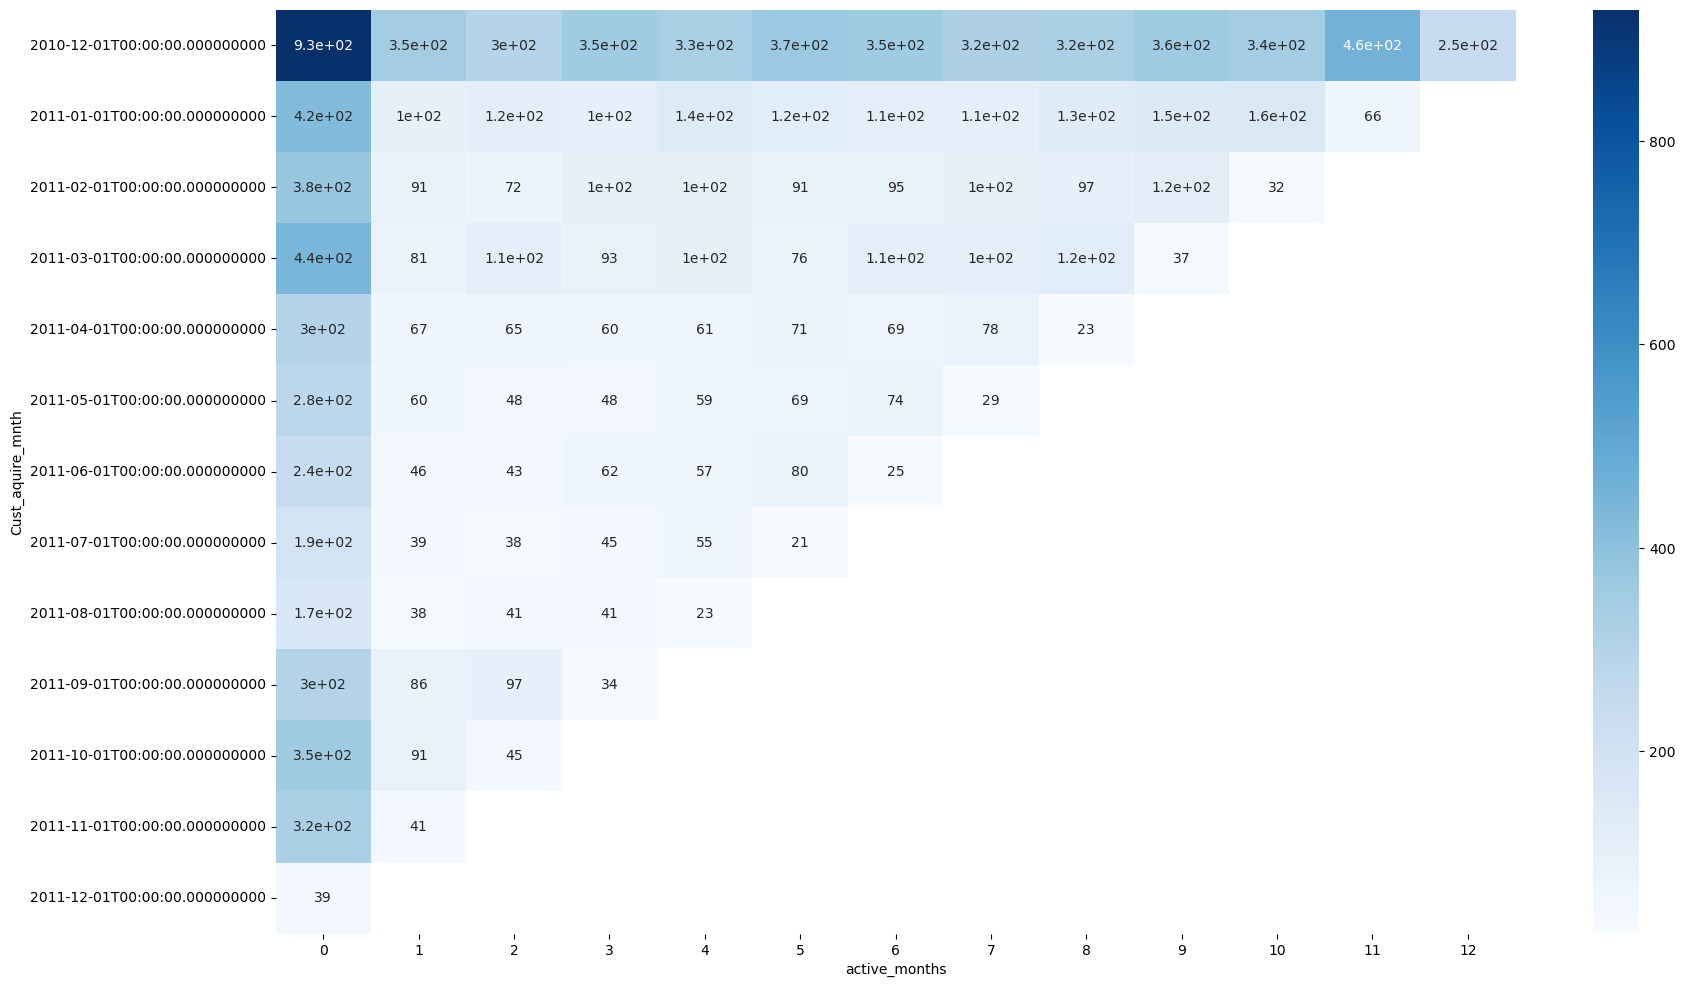

In [23]:
# we will visulalize this through a heatmap
plt.figure(figsize=(20,12))
sbn.heatmap(cust_pvt,annot=True, cmap='Blues')


In [24]:
#We can see that the index is not properly appearing,
cust_pvt.index=cust_pvt.index.strftime('%B %Y')

<AxesSubplot:xlabel='active_months', ylabel='Cust_aquire_mnth'>

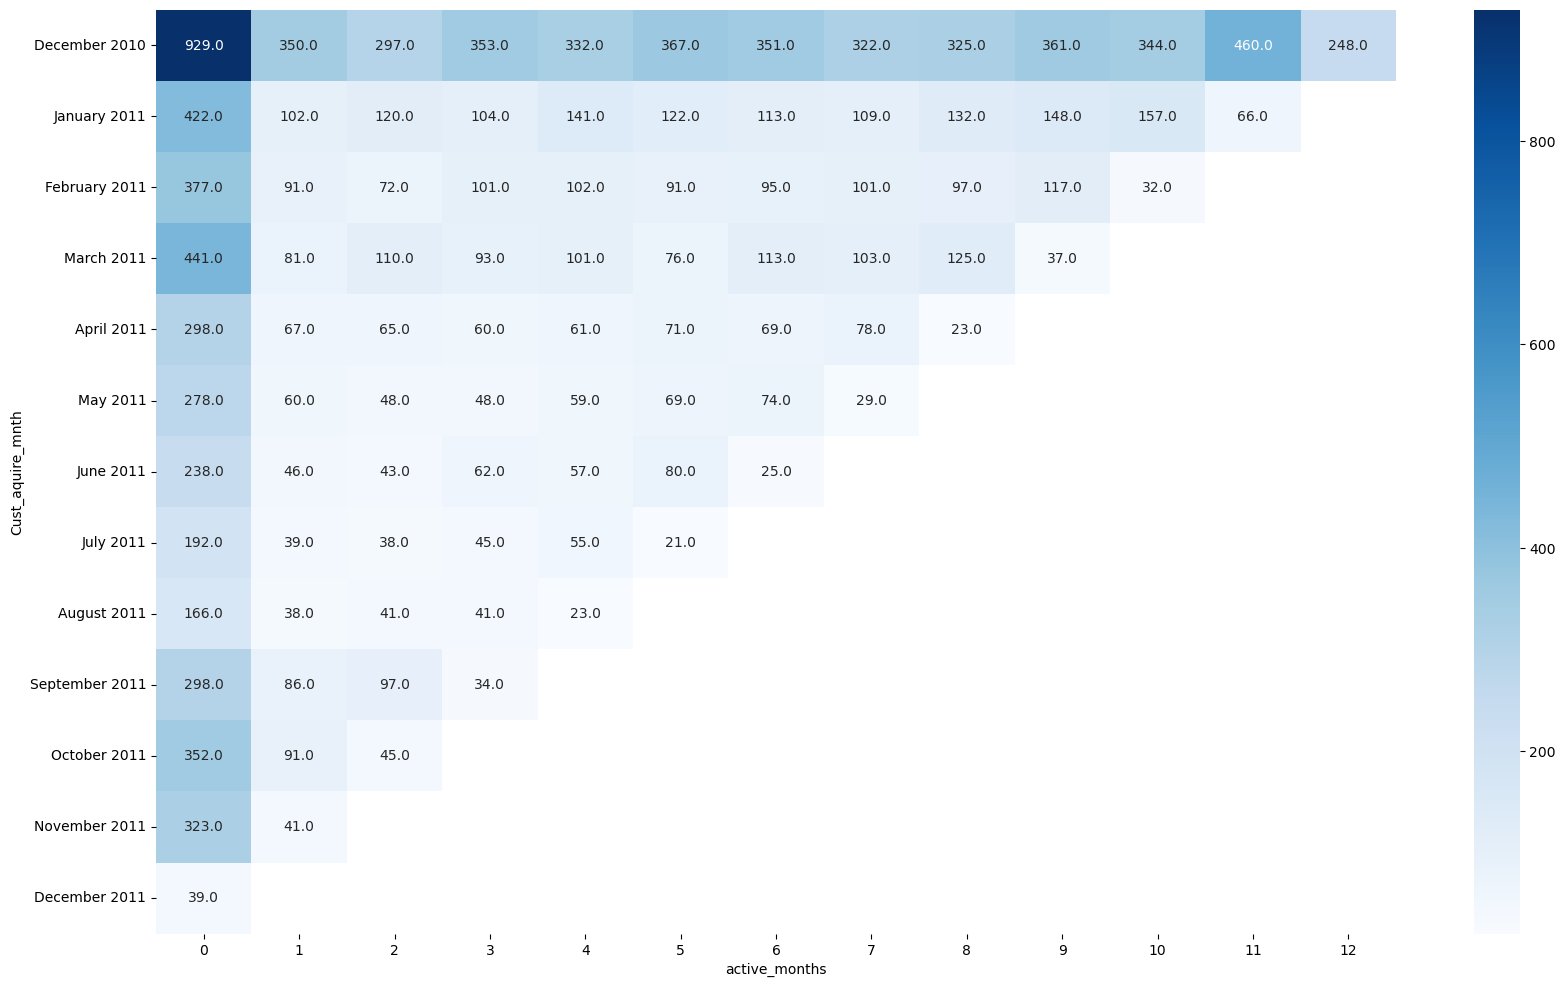

In [25]:
# we will visulalize this through a heatmap
plt.figure(figsize=(20,12))
sbn.heatmap(cust_pvt,annot=True, fmt='1.1f',cmap='Blues')


In [26]:
# We will see this data percentagewise
cohort_percent=cust_pvt.divide(cust_pvt.iloc[:,0],axis=0)
cohort_percent

active_months,0,1,2,3,4,5,6,7,8,9,10,11,12
Cust_aquire_mnth,,,,,,,,,,,,,
December 2010,1.0,0.376749,0.319699,0.379978,0.357374,0.395048,0.377826,0.346609,0.349839,0.388590,0.370291,0.495156,0.266954
January 2011,1.0,0.241706,0.284360,0.246445,0.334123,0.289100,0.267773,0.258294,0.312796,0.350711,0.372038,0.156398,NaN
February 2011,1.0,0.241379,0.190981,0.267905,0.270557,0.241379,0.251989,0.267905,0.257294,0.310345,0.084881,NaN,NaN
March 2011,1.0,0.183673,0.249433,0.210884,0.229025,0.172336,0.256236,0.233560,0.283447,0.083900,NaN,NaN,NaN
April 2011,1.0,0.224832,0.218121,0.201342,0.204698,0.238255,0.231544,0.261745,0.077181,NaN,NaN,NaN,NaN
May 2011,1.0,0.215827,0.172662,0.172662,0.212230,0.248201,0.266187,0.104317,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.193277,0.180672,0.260504,0.239496,0.336134,0.105042,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.203125,0.197917,0.234375,0.286458,0.109375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.228916,0.246988,0.246988,0.138554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='active_months', ylabel='Cust_aquire_mnth'>

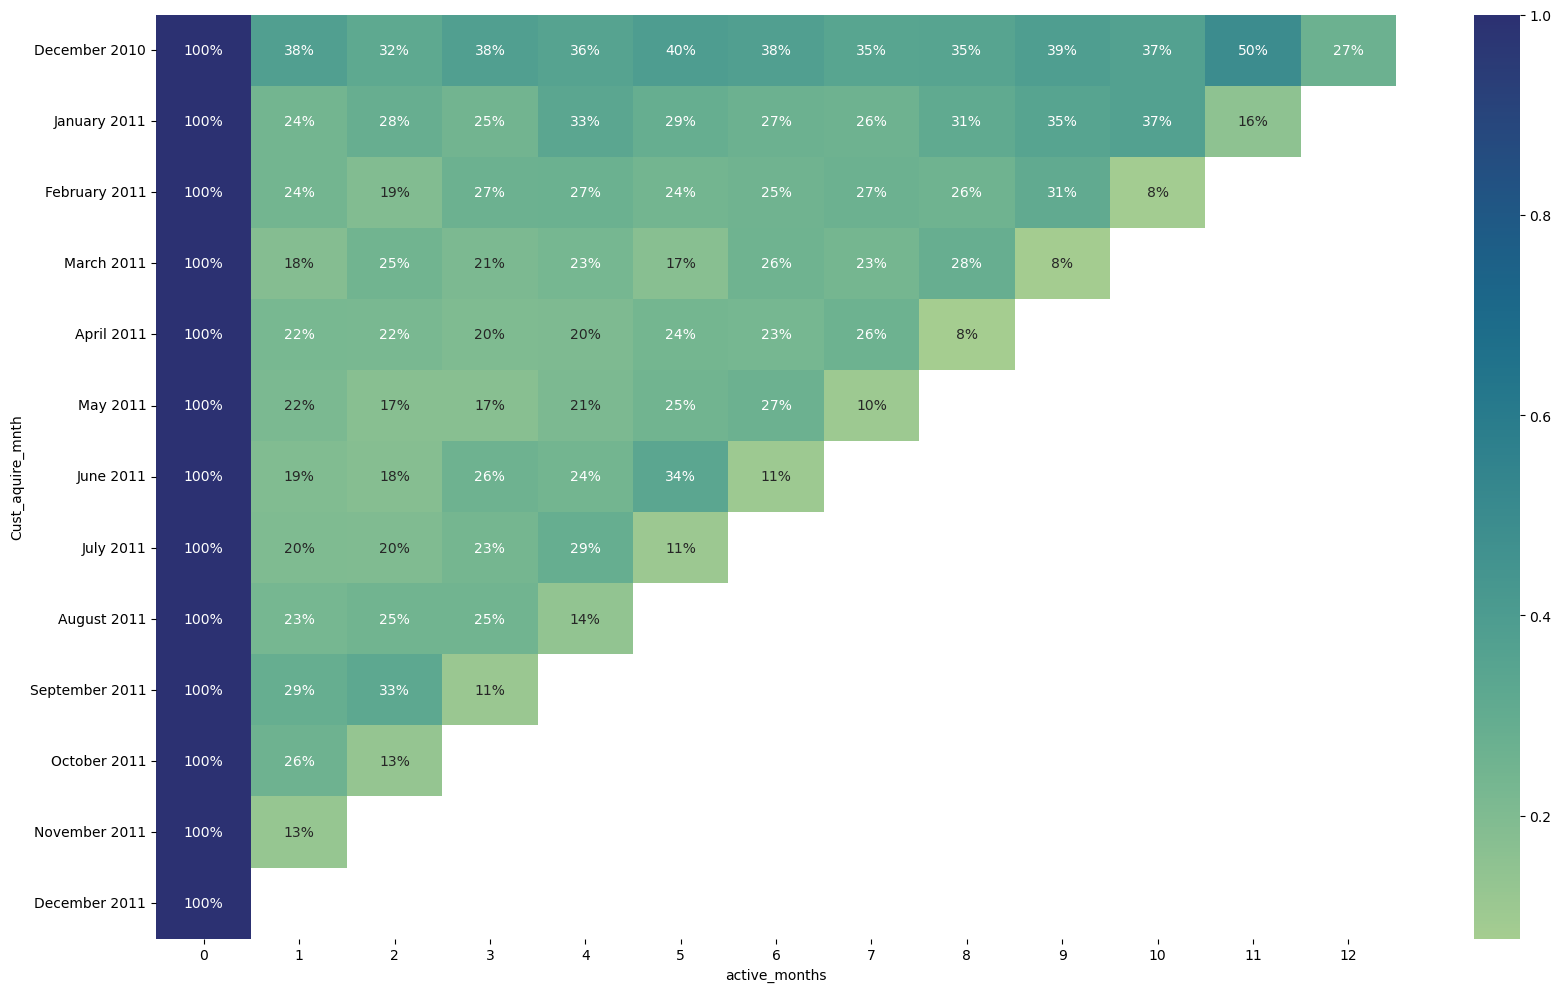

In [27]:
# we will visulalize this through a heatmap
plt.figure(figsize=(20,12))
sbn.heatmap(cohort_percent,annot=True, fmt='.0%',cmap=sbn.color_palette('crest',as_cmap=True))


#### The cohort December 2010 and January 2011 look stable, february 2011 cohort has one bump in the path ij the second month from the acquisition
#### March and may 2011 are the least stable cohorts133 of its active customer 
#### interestingly, november 2011 cohort has only 13% of its total acquired cutomers active in next month

## ----------Recency, Frequency, Monetory analysis-------

##### First we will find out what is the maximum invoice date

In [28]:
# We will convert the Date time values into only date and will set 1 as default day for every invoice for that month.

def get_date_2(x):
    #getting the date part and setting 1 as default date
    return dt.datetime(x.year,x.month,x.day)
    

In [29]:
retail_data_train['InvoiceDate'].max()
max_date='2011-12-10'
max_date=pd.to_datetime(max_date)

In [30]:
retail_data_train['recency']=(max_date-retail_data_train['InvoiceDate']).dt.days

In [31]:
retail_data_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoiceDate_dt,Cust_aquire_mnth,active_months,recency
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06-01,2011-02-01,4,184
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2011-05-01,2010-12-01,5,219
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2011-01-01,2010-12-01,1,323
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12-01,2010-12-01,0,364
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-05-01,2011-02-01,3,215


In [32]:
retail_data_train[retail_data_train['CustomerID']==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoiceDate_dt,Cust_aquire_mnth,active_months,recency
195933,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01-01,2011-01-01,0,325
322892,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-01,2011-01-01,0,325


In [33]:
retail_data_train['monetary']=retail_data_train['UnitPrice']*retail_data_train['Quantity']


In [34]:
# We will create table one by one for recency,frequency and for the amount the cusstomer spent
recency_table=retail_data_train.groupby(['CustomerID'])['recency'].min()
recency_table

CustomerID
12346.0    325
12347.0      2
12348.0     75
12349.0     18
12350.0    310
          ... 
18280.0    277
18281.0    180
18282.0      7
18283.0      3
18287.0     42
Name: recency, Length: 4353, dtype: int64

In [35]:
frequency_table=retail_data_train.groupby(['CustomerID'])['InvoiceNo'].nunique()
frequency_table

CustomerID
12346.0     2
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     3
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4353, dtype: int64

In [36]:
monetary_table=retail_data_train.groupby(['CustomerID'])['monetary'].sum()
monetary_table

CustomerID
12346.0       0.00
12347.0    3124.96
12348.0    1009.88
12349.0    1344.17
12350.0     213.30
            ...   
18280.0      91.70
18281.0      59.28
18282.0     118.16
18283.0    1480.26
18287.0    1430.78
Name: monetary, Length: 4353, dtype: float64

In [37]:
RFM_table=pd.DataFrame({'Cust_id':monetary_table.index,'recency':recency_table.values,
                        'frequency':frequency_table.values,
                          'monetary':monetary_table.values})
RFM_table.head()

,Cust_id,recency,frequency,monetary
0,12346.0,325,2,0.00
1,12347.0,2,7,3124.96
2,12348.0,75,4,1009.88
3,12349.0,18,1,1344.17
4,12350.0,310,1,213.30


In [38]:
# We will only select that data where monetary is >0
RFM_table=RFM_table.query('monetary>0 and frequency>0 and recency>0')
RFM_table.head()

,Cust_id,recency,frequency,monetary
1,12347.0,2,7,3124.96
2,12348.0,75,4,1009.88
3,12349.0,18,1,1344.17
4,12350.0,310,1,213.30
5,12352.0,36,10,1469.03


In [39]:
# defining function to get Recency score
def get_r_score(x,Q):
    if x<=Q[0.25]:
        return 5
    elif x>Q[0.25] and x<=Q[0.50]:
        return 4
    elif x>Q[0.50] and x<=Q[0.75]:
        return 3
    elif x>Q[0.75]:
        return 2

# defining function to get frequency score
    
def get_f_score(x,Q):
    if x<=Q[0.25]:
        return 2
    elif x>Q[0.25] and x<=Q[0.50]:
        return 3
    elif x>Q[0.50] and x<=Q[0.75]:
        return 4
    elif x>Q[0.75]:
        return 5
# defining function to get monetary score
def get_M_score(x,Q):
    if x<=Q[0.25]:
        return 2
    elif x>Q[0.25] and x<=Q[0.50]:
        return 3
    elif x>Q[0.50] and x<=Q[0.75]:
        return 4
    elif x>Q[0.75]:
        return 5

In [40]:
# We will use these quartile values for calculation of r,m and f scores
Q_M=RFM_table['monetary'].quantile(q=[0.25,0.50,0.75])
Q_R=RFM_table['recency'].quantile(q=[0.25,0.50,0.75])
Q_F=RFM_table['frequency'].quantile(q=[0.25,0.50,0.75])

In [41]:
Q_R

0.25     17.0
0.50     50.0
0.75    142.0
Name: recency, dtype: float64

In [42]:
#getting RMF scores
RFM_table['R_score']=RFM_table['recency'].apply(lambda x: get_r_score(x,Q_R))
RFM_table['M_score']=RFM_table['monetary'].apply(lambda x: get_M_score(x,Q_M))
RFM_table['F_score']=RFM_table['frequency'].apply(lambda x: get_f_score(x,Q_F))

In [43]:
RFM_table.head()

,Cust_id,recency,frequency,monetary,R_score,M_score,F_score
1,12347.0,2,7,3124.96,5,5,5
2,12348.0,75,4,1009.88,3,4,4
3,12349.0,18,1,1344.17,4,5,2
4,12350.0,310,1,213.30,2,3,2
5,12352.0,36,10,1469.03,4,5,5


In [44]:
# Segmenting thencustomer and calculation the total score for each customer
RFM_table['Total_score']=RFM_table[['R_score','M_score','F_score']].sum(axis=1)
RFM_table['Segement']=RFM_table['R_score'].apply(str)+RFM_table['M_score'].apply(str)+RFM_table['F_score'].apply(str)


In [45]:
RFM_table.head()

,Cust_id,recency,frequency,monetary,R_score,M_score,F_score,Total_score,Segement
1,12347.0,2,7,3124.96,5,5,5,15,555
2,12348.0,75,4,1009.88,3,4,4,11,344
3,12349.0,18,1,1344.17,4,5,2,11,452
4,12350.0,310,1,213.30,2,3,2,7,232
5,12352.0,36,10,1469.03,4,5,5,14,455


In [46]:
RFM_table['cust_category']=pd.qcut(RFM_table['Total_score'],q=4,labels=['Bronze','Silver','Gold','Platinum'])
RFM_table.head()

,Cust_id,recency,frequency,monetary,R_score,M_score,F_score,Total_score,Segement,cust_category
1,12347.0,2,7,3124.96,5,5,5,15,555,Platinum
2,12348.0,75,4,1009.88,3,4,4,11,344,Gold
3,12349.0,18,1,1344.17,4,5,2,11,452,Gold
4,12350.0,310,1,213.30,2,3,2,7,232,Bronze
5,12352.0,36,10,1469.03,4,5,5,14,455,Platinum


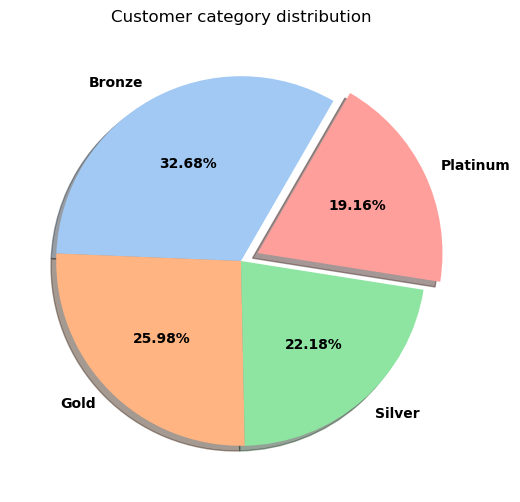

In [47]:
# We will do some customer category analysis
plt.figure(figsize=(8,6))
size=RFM_table['cust_category'].value_counts()
label=RFM_table['cust_category'].value_counts().index
explode=[0,0,0,0.1]

plt.pie(x=size,labels=label,explode=explode, autopct='%1.2f%%',
        shadow=True,colors=sbn.color_palette('pastel'),startangle=60,
        textprops={'weight':'bold'},radius=1)

plt.title("Customer category distribution")
plt.savefig("cust_cat_pie.png")

#### We can see here that, we have about 19% Platinum level customers, we can offer some exclusive memberships to these customers
#### our gold and silver are about same- Gold customers can be braught in platinum caregory by engaging with them more. Sending them news letters to update them about new products etc
#### bronze customers are on the verge of churn. they need special attention. We can offer them some discounts on weekdays thereby increasing their engagement

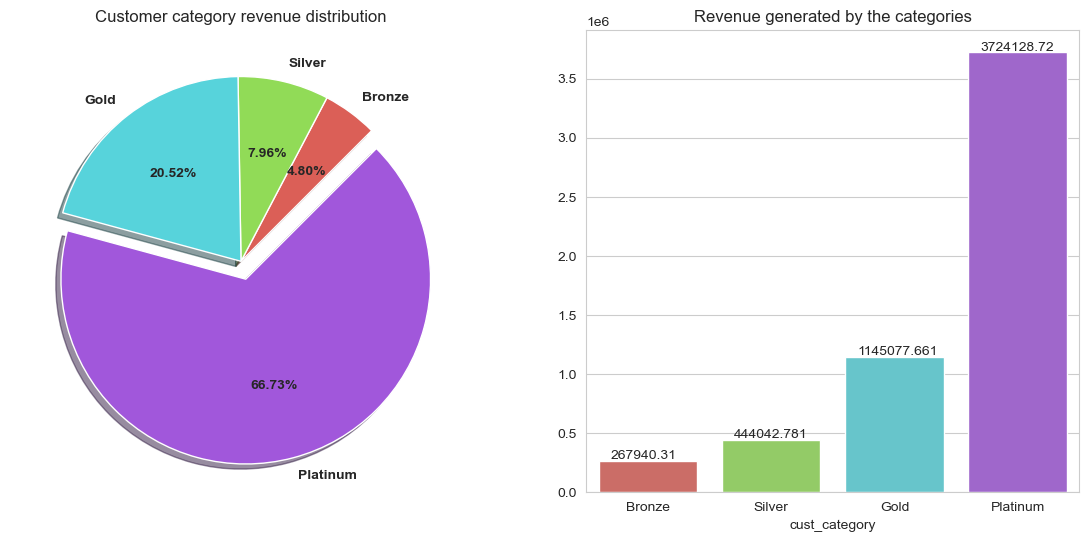

In [49]:
# Now we will see how much revenue each category has generated
cust_cat_revenue=RFM_table.groupby(by='cust_category')['monetary'].agg('sum')
sbn.set_style('whitegrid')

plt.figure(figsize=(14,6))
size=cust_cat_revenue
label=cust_cat_revenue.index
explode=[0,0,0,0.1]

plt.subplot(1,2,1)
plt.pie(x=size,labels=label,explode=explode, autopct='%1.2f%%',
        shadow=True,colors=sbn.color_palette("hls",4),startangle=45,
        textprops={'weight':'bold'},radius=1)
plt.title("Customer category revenue distribution")
plt.savefig("cust_cat__rev_pie.png")

plt.subplot(1,2,2)
sbn.barplot(x=cust_cat_revenue.index,y=cust_cat_revenue.values,palette=sbn.color_palette("hls",4))
plt.title("Revenue generated by the categories")
for i,j in enumerate(cust_cat_revenue):
    plt.text(i-0.3,j+15000,j)

#### We can clearly see that 19% platinum customers are bringing 67% of revenue. Then gold customers abput 20.52%.
#### the revenue braught by silver and bronze type of customers put together is about 12.76%

# ------------------------ Clustering Approach ---------------------

In [50]:
# We will only choose recency, frequency and monetary columsns from our RMF table.
RMF_cluster=RFM_table[['recency','frequency','monetary']]

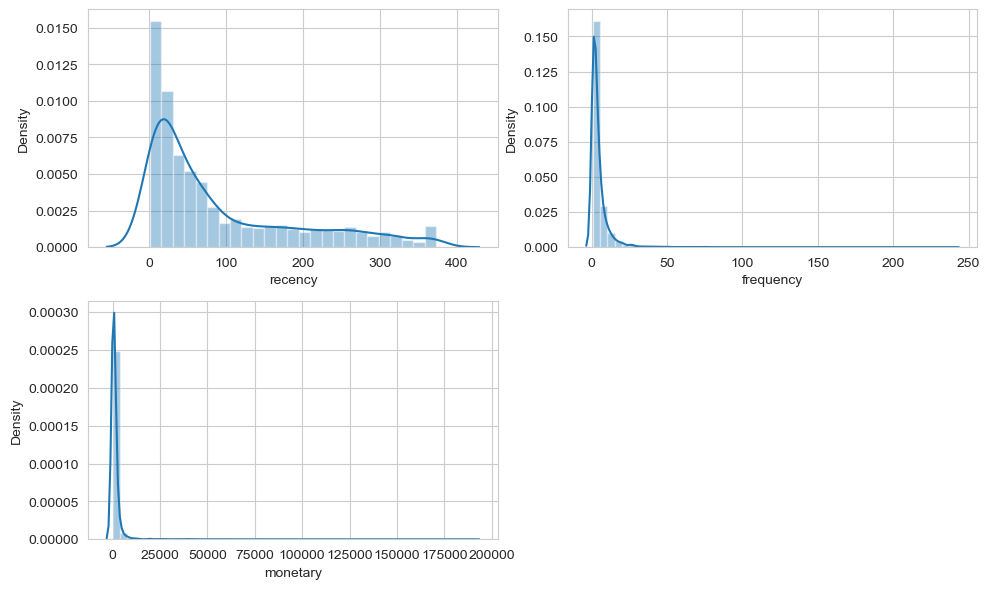

In [51]:
plt.figure(figsize=(10,6))

for i,j in enumerate(RMF_cluster):
    plt.subplot(2,2,i+1)
    sbn.distplot(RMF_cluster[j],kde=True)
    plt.tight_layout()


#### We can see that the data is highly right skewed. So we will apply log transformation on it.

In [52]:
RMF_cluster=RMF_cluster.apply(np.log,axis=1).round(2)

In [53]:
RMF_cluster.isnull().sum()

recency      0
frequency    0
monetary     0
dtype: int64

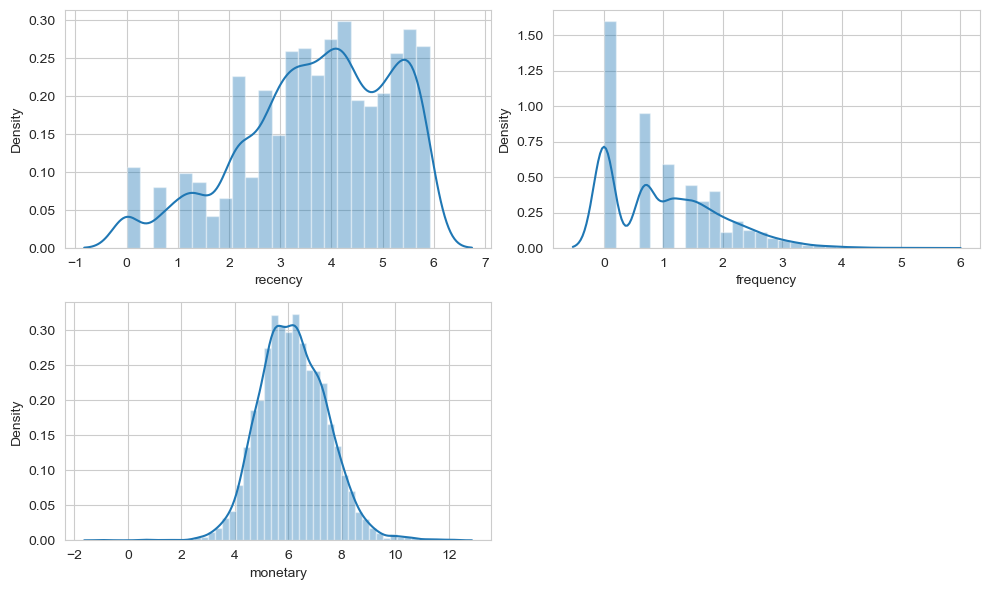

In [54]:
# lets observe the data again
plt.figure(figsize=(10,6))

for i,j in enumerate(RMF_cluster):
    plt.subplot(2,2,i+1)
    sbn.distplot(RMF_cluster[j],kde=True)
    plt.tight_layout()


#### We will also scale the data

In [55]:
std_scal=StandardScaler()
RMF_cluster_scaled=std_scal.fit_transform(RMF_cluster)

scaled_data=pd.DataFrame(RMF_cluster_scaled,columns=RMF_cluster.columns,index=RMF_cluster.index)

In [57]:
### We will use elbow method to find out optimum number of clusters
clust_dict={}
for i in range(2,15): # chose range 2 to 15 to get rid of nonetype error
    kmean_clust=KMeans(n_clusters=i,init='k-means++',max_iter=1000)
    kmean_clust.fit(scaled_data)
    clust_dict[i]=kmean_clust.inertia_

<AxesSubplot:>

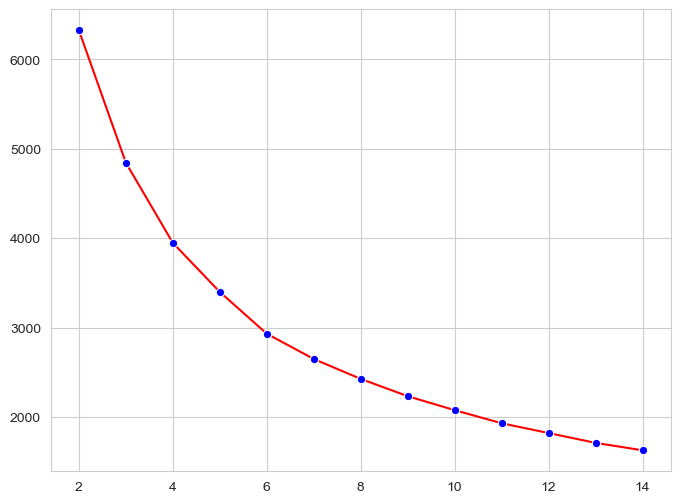

In [58]:
# We will plot a lineplot to observe 
plt.figure(figsize=(8,6))
sbn.lineplot(x=clust_dict.keys(),y=clust_dict.values(),marker='o',markerfacecolor='blue',color='red')

#### We will select 4 as optimum number of clusters

In [59]:
# Training the data with 4 number of clusters
kmean_clust=KMeans(n_clusters=4,init='k-means++',max_iter=1000)
kmean_clust.fit(scaled_data)

KMeans(max_iter=1000, n_clusters=4)

In [60]:
RFM_table['Clusters']=kmean_clust.labels_

In [61]:
RFM_table

,Cust_id,recency,frequency,monetary,R_score,M_score,F_score,Total_score,Segement,cust_category,Clusters
1,12347.0,2,7,3124.96,5,5,5,15,555,Platinum,3
2,12348.0,75,4,1009.88,3,4,4,11,344,Gold,0
3,12349.0,18,1,1344.17,4,5,2,11,452,Gold,2
4,12350.0,310,1,213.30,2,3,2,7,232,Bronze,1
5,12352.0,36,10,1469.03,4,5,5,14,455,Platinum,0
...,...,...,...,...,...,...,...,...,...,...,...
4348,18280.0,277,1,91.70,2,2,2,6,222,Bronze,1
4349,18281.0,180,1,59.28,2,2,2,6,222,Bronze,1
4350,18282.0,7,3,118.16,5,2,3,10,523,Silver,2
4351,18283.0,3,16,1480.26,5,5,5,15,555,Platinum,3
